In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
size = 1000000
subset_1 = np.random.normal(-1, 0.5, size=[size])
subset_2 = np.random.normal(1, 0.5, size=[size])

## Styles

There are a lot of predefined styles that can be used together with your own customizations to make nicer plots. One can either set these styles globally with `plt.style.use()` or temporarily with a context manager using `plt.syle.context()`.

In [3]:
def reusable_plot():
    plt.hist(subset_1, alpha=0.5, ec='k', label='subset 1')
    plt.hist(subset_2, alpha=0.5, ec='k', label='subset 2')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('counts')
    plt.title('Two gaussians')

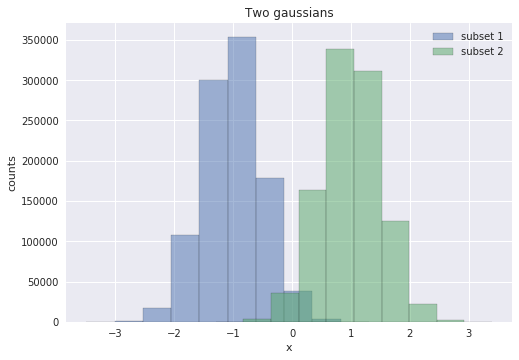

In [6]:
with plt.style.context('seaborn'):
    reusable_plot()

There are a lot of styles available:

In [5]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'presentation', u'seaborn-dark-palette']


Styles can be combined, by passing a list of styles. Properties, which both styles want to set are determined by the last style in the list, which tries to set it.

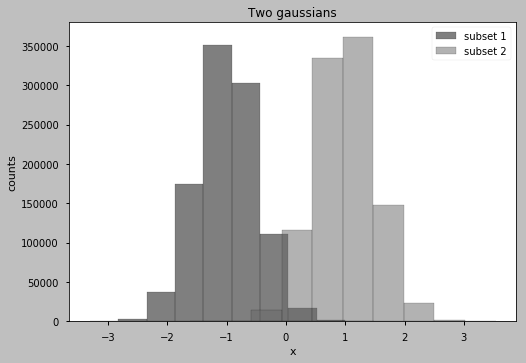

In [6]:
with plt.style.context(['seaborn-notebook', 'grayscale']):
    reusable_plot()

You can even define your own styles by creating a stylefile and passing its path or putting it into your `mpl_configdir/stylelib/<your_style>.mplsyle` and the using its name. 

Below we will create a style called `presentation`.

In [7]:
!echo axes.titlesize : 24 > presentation.mplstyle
!echo axes.labelsize : 20 >> presentation.mplstyle
!echo lines.linewidth : 3 >> presentation.mplstyle
!echo lines.markersize : 10 >> presentation.mplstyle
!echo xtick.labelsize : 16 >> presentation.mplstyle
!echo ytick.labelsize : 16 >> presentation.mplstyle
!echo legend.fontsize : 14 >> presentation.mplstyle
!echo font.size : 14 >> presentation.mplstyle

This file should be copied to this location to make it available whenever we need it.

In [8]:
import matplotlib as mpl

print mpl.get_configdir()

/home/jhaux/.config/matplotlib


This is what we do here

In [9]:
import os

cp_path = os.path.join(mpl.get_configdir(), 'stylelib')
try:
    os.mkdir(cp_path)
except OSError:
    pass

!cp presentation.mplstyle "$cp_path"/presentation.mplstyle

In [10]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'presentation', u'seaborn-dark-palette']


Sadly our style seems not to be available. This is due to the fact that the module `plt` did not yet register it. The easiest way to cope with this is to restart the kernel (`Kernel->Restart`) and run all cells (`Cell->Run All`).

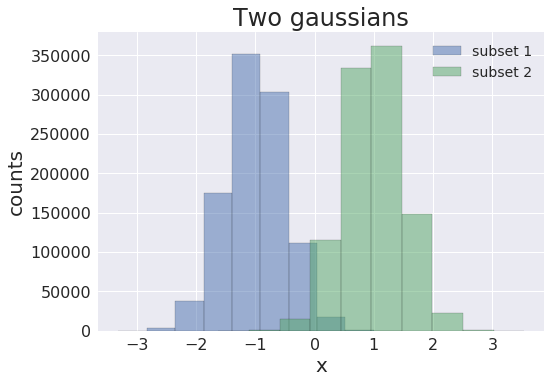

In [11]:
with plt.style.context(['seaborn', 'presentation']):
    reusable_plot()

All the predefined styles can be found where your matplotlib is installed, in the subdirectory `.../mpl-data/stylelib`. To get an idea, what properties can be set and how to do it I recommend to take a look at `seaborn.mplstyle`.

In [12]:
style_path = os.path.join('/'+'/'.join(mpl.__file__.strip('/').split('/')[:-1]), 'mpl-data/stylelib')
print 'Here are your styles: {}'.format(style_path)

Here are your styles: /usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/stylelib


On a side note:

It is also possible to make xkcd plots...

Get the font [here](https://github.com/ipython/xkcd-font/raw/master/xkcd/build/xkcd.otf).
If the font is not found automatically after installation clear your matplotlib cache by deleting everything inside `~/.cache/matplotlib/`.

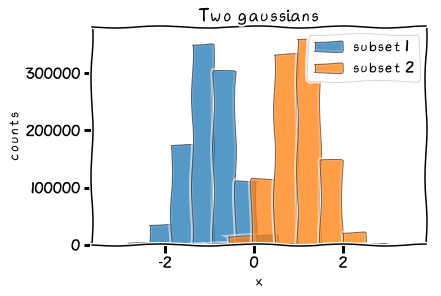

In [20]:
plt.xkcd()
reusable_plot()